In [1]:
#import libraries
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.image as img
import matplotlib.pyplot as plt
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
import os
from tensorflow.keras.models import *
from keras.preprocessing import image
import warnings
warnings.filterwarnings('ignore')
from keras.preprocessing import image

In [4]:
#load dataset
#train_path = "C:/Users/Admin/python/S6SoftwareEngineer/E_Commerce_Recognition/ML/dataset/train"
# test_path = "C:/Users/Admin/python/S6SoftwareEngineer/E_Commerce_Recognition/ML/dataset/test"
# val_path = "C:/Users/Admin/python/S6SoftwareEngineer/E_Commerce_Recognition/ML/dataset/validation"
# image_category =os.listdir("C:/Users/Admin/python/S6SoftwareEngineer/E_Commerce_Recognition/ML/dataset/train")
train_path = "./dataset/train"
test_path = "./dataset/test"
val_path = "./dataset/validation"
image_category =os.listdir("./dataset/train")

In [43]:
#plot the dataset
def plot_image (image_category):
    
    plt.figure(figsize=(10,10))

    for i, catrgory in enumerate(image_category):

        image_path = train_path + '/' + catrgory
        image_in_folder = os.listdir(image_path)

        first_image = image_in_folder[0]
        first_image_in_path = image_path+'/'+ first_image
        img= image.load_img(first_image_in_path)
        img_array = image.img_to_array(img) /255
        plt.subplot(7,6,i+1)
        plt.imshow(img_array)
        plt.title(catrgory)
        plt.axis('off')
    plt.show()

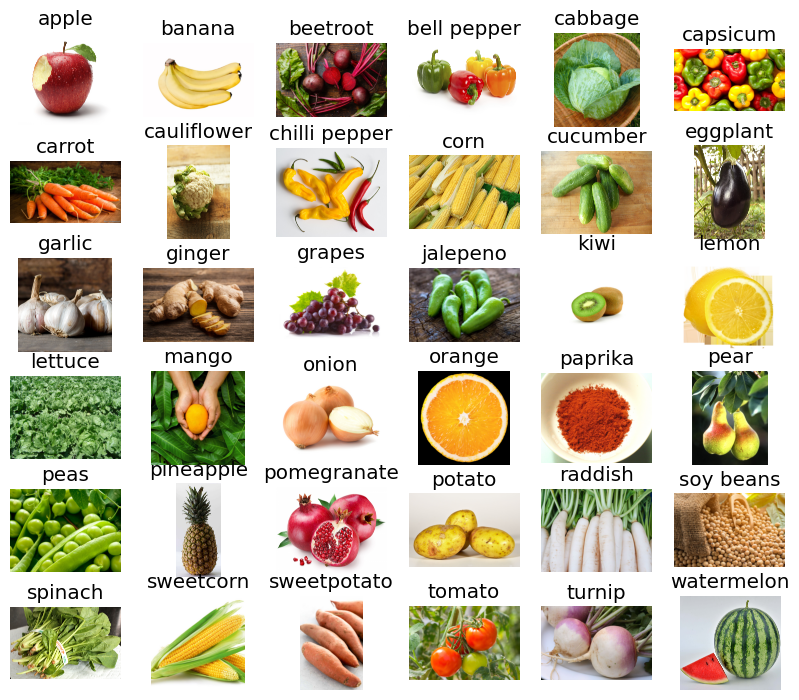

In [44]:
plot_image (image_category)

In [45]:
#Apply the suitable Image Preprocessing by using ImageDataGenerator
train_generator = ImageDataGenerator(rescale = 1.0/255.0)
train_image_generator = train_generator.flow_from_directory(
                                                train_path,
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical'
                                                )

test_generator = ImageDataGenerator(rescale = 1.0/255.0)
test_image_generator = test_generator.flow_from_directory(
                                                test_path,
                                             target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical'
                                                )
val_generator = ImageDataGenerator(rescale = 1.0/255.0)
val_image_generator = val_generator.flow_from_directory(
                                                val_path,
                                               target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical'
                                                )


Found 3115 images belonging to 36 classes.
Found 359 images belonging to 36 classes.
Found 351 images belonging to 36 classes.


In [46]:
#build CNN Model 
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = 3,  padding = 'same', activation = 'relu',
                     input_shape = (224, 224, 3)))
cnn_model.add(MaxPooling2D(pool_size= (2,2)))
cnn_model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
cnn_model.add(MaxPooling2D())
cnn_model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',  activation = 'relu'))
cnn_model.add(MaxPooling2D())
cnn_model.add(Conv2D(filters=64, activation='relu', padding='same',kernel_size=3 ))
cnn_model.add(MaxPooling2D())
cnn_model.add(Conv2D(filters=64, activation='relu', padding='same',kernel_size=3 ))
cnn_model.add(MaxPooling2D())
cnn_model.add(Conv2D(filters=64, activation='relu', padding='same',kernel_size=3 ))
cnn_model.add(MaxPooling2D())
cnn_model.add(Conv2D(filters=128, activation='relu', padding='same',kernel_size=3 ))
cnn_model.add(MaxPooling2D())
cnn_model.add(Dropout(0.2))
cnn_model.add(Conv2D(filters=128, activation='relu', padding='same',kernel_size=3 ))
cnn_model.add(Conv2D(filters=128, activation='relu', padding='same',kernel_size=3 ))
cnn_model.add(Conv2D(filters = 128, kernel_size = 3,  padding = 'same',   activation = 'relu'))
cnn_model.add(Conv2D(filters=128, activation='relu', padding='same',kernel_size=3 ))
cnn_model.add(Conv2D(filters=265, activation='relu', padding='same',kernel_size=3 ))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation = 'relu'))
cnn_model.add(Dense(64, activation = 'relu'))
cnn_model.add(Dense(36, activation = 'softmax'))


In [47]:
cnn_model.summary()

In [48]:
#compiler
cnn_model.compile(
    optimizer='Adam', 
    loss ='categorical_crossentropy', 
    metrics=['accuracy'])

In [49]:
#fit
model_history = cnn_model.fit(train_image_generator,
                             epochs =10 ,
                             validation_data = val_image_generator,
                             )

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.0220 - loss: 3.5836 - val_accuracy: 0.0285 - val_loss: 3.5837
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.0362 - loss: 3.5815 - val_accuracy: 0.0285 - val_loss: 3.5845
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.0282 - loss: 3.5811 - val_accuracy: 0.0285 - val_loss: 3.5860
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.0315 - loss: 3.5808 - val_accuracy: 0.0285 - val_loss: 3.5874
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.0324 - loss: 3.5795 - val_accuracy: 0.0285 - val_loss: 3.5934
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.0239 - loss: 3.5794 - val_accuracy: 0.0256 - val_loss: 3.5866
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.0317 - loss: 3.5778 - val_accuracy: 0.0256 - val_loss: 3.5870
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.0353 - loss: 3.5775 - val_accuracy: 0.0256 - v

In [50]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model_history_2 = model.fit(
                         train_image_generator,
                             epochs =10 ,
                             validation_data = val_image_generator,
                               batch_size = 32,
     
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

In [51]:
#ploting the output accuarcy

#plot history of loss and accuracy
hist = model_history.history
plt.style.use('ggplot')
plt.figure(figsize = (10,5))

#loss history
plt.plot(hist['loss'], c = 'red', label = 'train loss')
plt.plot(hist['val_loss'], c = 'red', label = 'validation loss', linestyle = '--')

#accuracy history
plt.plot(hist['accuracy'], c = 'blue', label = 'train accuracy')
plt.plot(hist['val_accuracy'], c = 'blue', label = 'validation accuracy', linestyle = '--')


plt.xlabel("number of epochs")
plt.show()

In [52]:
#plot history of loss and accuracy
hist = model_history_2.history
plt.style.use('ggplot')
plt.figure(figsize = (10,5))

#loss history
plt.plot(hist['loss'], c = 'red', label = 'train loss')
plt.plot(hist['val_loss'], c = 'red', label = 'validation loss', linestyle = '--')

#accuracy history
plt.plot(hist['accuracy'], c = 'blue', label = 'train accuracy')
plt.plot(hist['val_accuracy'], c = 'blue', label = 'validation accuracy', linestyle = '--')


plt.xlabel("number of epochs")
plt.show()

In [53]:
#evaluate
cnn_model.evaluate(test_image_generator)
cnn_model.evaluate(train_image_generator)
cnn_model.evaluate(val_image_generator)

12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.0361 - loss: 3.5833
98/98 ━━━━━━━━━━━━━━━━━━━━ 77s 782ms/step - accuracy: 0.0285 - loss: 3.5778
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.0173 - loss: 3.5844


[3.5880796909332275, 0.025641025975346565]

In [54]:
model.evaluate(test_image_generator)
model.evaluate(train_image_generator)
model.evaluate(val_image_generator)

In [55]:
labels = {value: key for key, value in train_image_generator.class_indices.items()}

print("Label Mappings for classes \n")
for key, value in labels.items():
    print(f"{key} : {value}")

In [56]:
ModelLoss, ModelAccuracy = cnn_model.evaluate(test_image_generator)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 967ms/step - accuracy: 0.0346 - loss: 3.5839
Test Loss is 3.58596134185791
Test Accuracy is 0.027855154126882553


In [57]:
ModelLoss, ModelAccuracy = model.evaluate(test_image_generator)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

In [58]:
class_map = dict([v,k] for k,v in train_image_generator.class_indices.items())
print(class_map)

{0: 'apple', 1: 'banana', 2: 'beetroot', 3: 'bell pepper', 4: 'cabbage', 5: 'capsicum', 6: 'carrot', 7: 'cauliflower', 8: 'chilli pepper', 9: 'corn', 10: 'cucumber', 11: 'eggplant', 12: 'garlic', 13: 'ginger', 14: 'grapes', 15: 'jalepeno', 16: 'kiwi', 17: 'lemon', 18: 'lettuce', 19: 'mango', 20: 'onion', 21: 'orange', 22: 'paprika', 23: 'pear', 24: 'peas', 25: 'pineapple', 26: 'pomegranate', 27: 'potato', 28: 'raddish', 29: 'soy beans', 30: 'spinach', 31: 'sweetcorn', 32: 'sweetpotato', 33: 'tomato', 34: 'turnip', 35: 'watermelon'}


In [59]:
import numpy as np
test_image_path ="./dataset/Image_1.jpg"
def predictions(test_image_path):

    #load and preprocessing image
    test_img = image.load_img(test_image_path, target_size = (224, 224))
    test_img_arr = image.img_to_array(test_img)/ 255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1] , test_img_arr.shape[2]))

    # prediction
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_img = class_map[predicted_label]
    return predicted_img



In [60]:
predictions(test_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


'grapes'